In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [96]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
#checking the shape of data set
df.shape

(1000, 40)

In [4]:
#checking for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
#droping column_c39 as its doesn't adds any value
df.drop(columns=["_c39"],inplace=True)

In [6]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#there are 21 object type columns rest are float and int columns.

In [8]:
#Finding if special characters are present in the data 
df.isin(['?']).sum(axis=0)

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [9]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [10]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [11]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [12]:
#checking null values 
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Exploratory Data Analysis

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

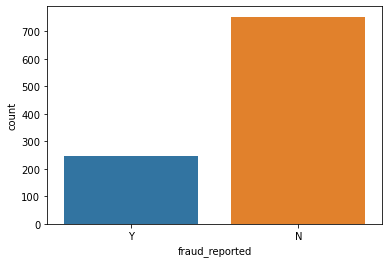

In [13]:
#fraud_reported
sns.countplot(df['fraud_reported'])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

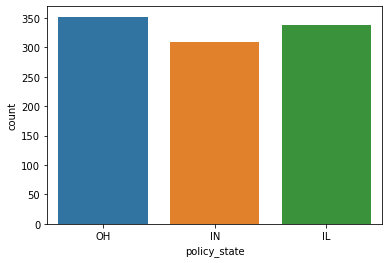

In [14]:
#policy_state
sns.countplot(df['policy_state'])

In [15]:
#Policy in all the state is approx equal

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

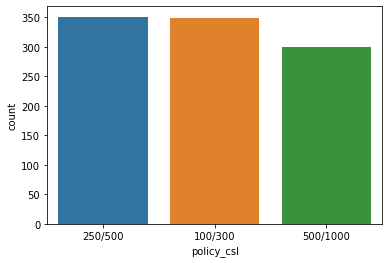

In [16]:
#policy_csl
sns.countplot(df['policy_csl'])

In [17]:
#Policy_csl is nearly equal for all the values

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

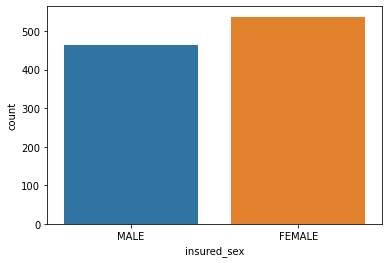

In [18]:
#insured_sex
sns.countplot(df['insured_sex'])

In [19]:
#there are more number of female than male.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

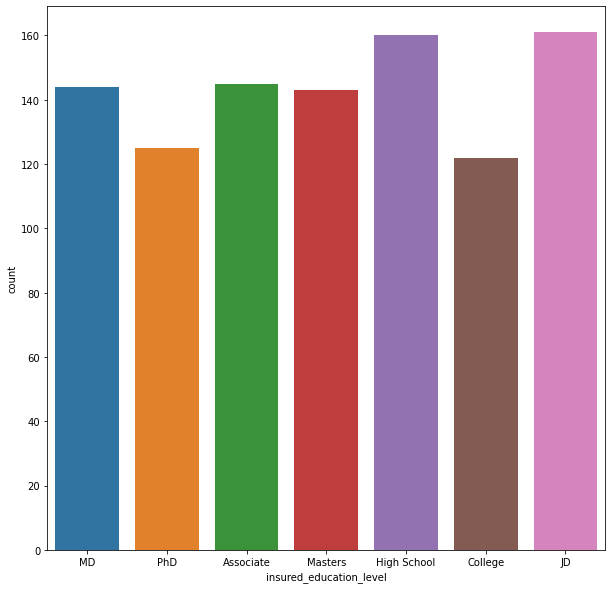

In [20]:
#insured_education_level
plt.subplots(figsize=(10,10))
sns.countplot(df['insured_education_level'])

In [21]:
#People from all education background are insured comparabely.

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

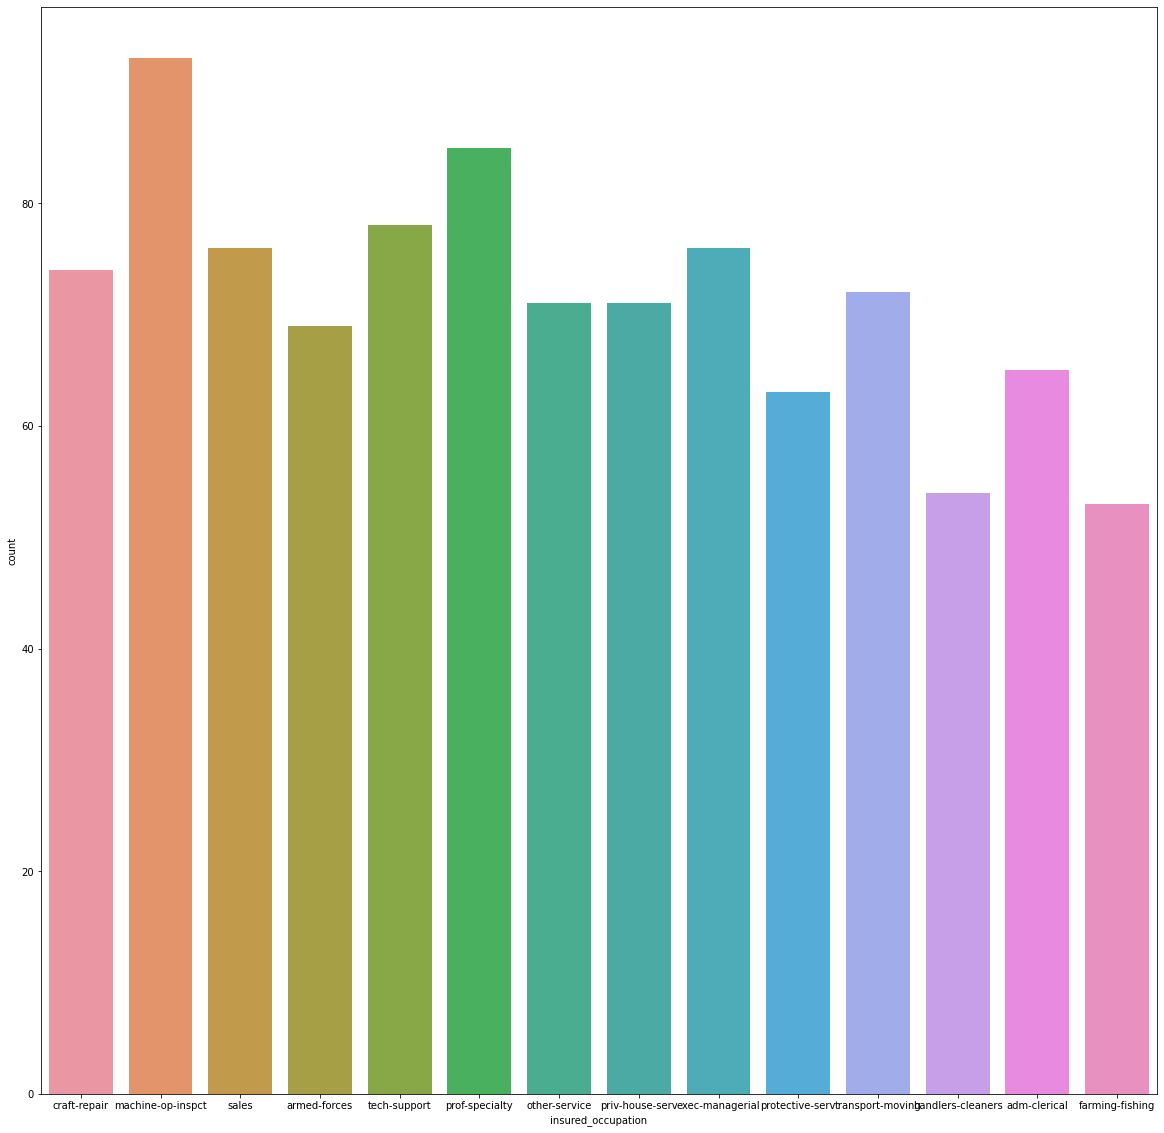

In [24]:
plt.subplots(figsize=(20,20))
sns.countplot(df['insured_occupation'])

In [25]:
#the highest number of insured people employed in machine-op-inspct and prof-speciality while handlers cleaners has the lowest.

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

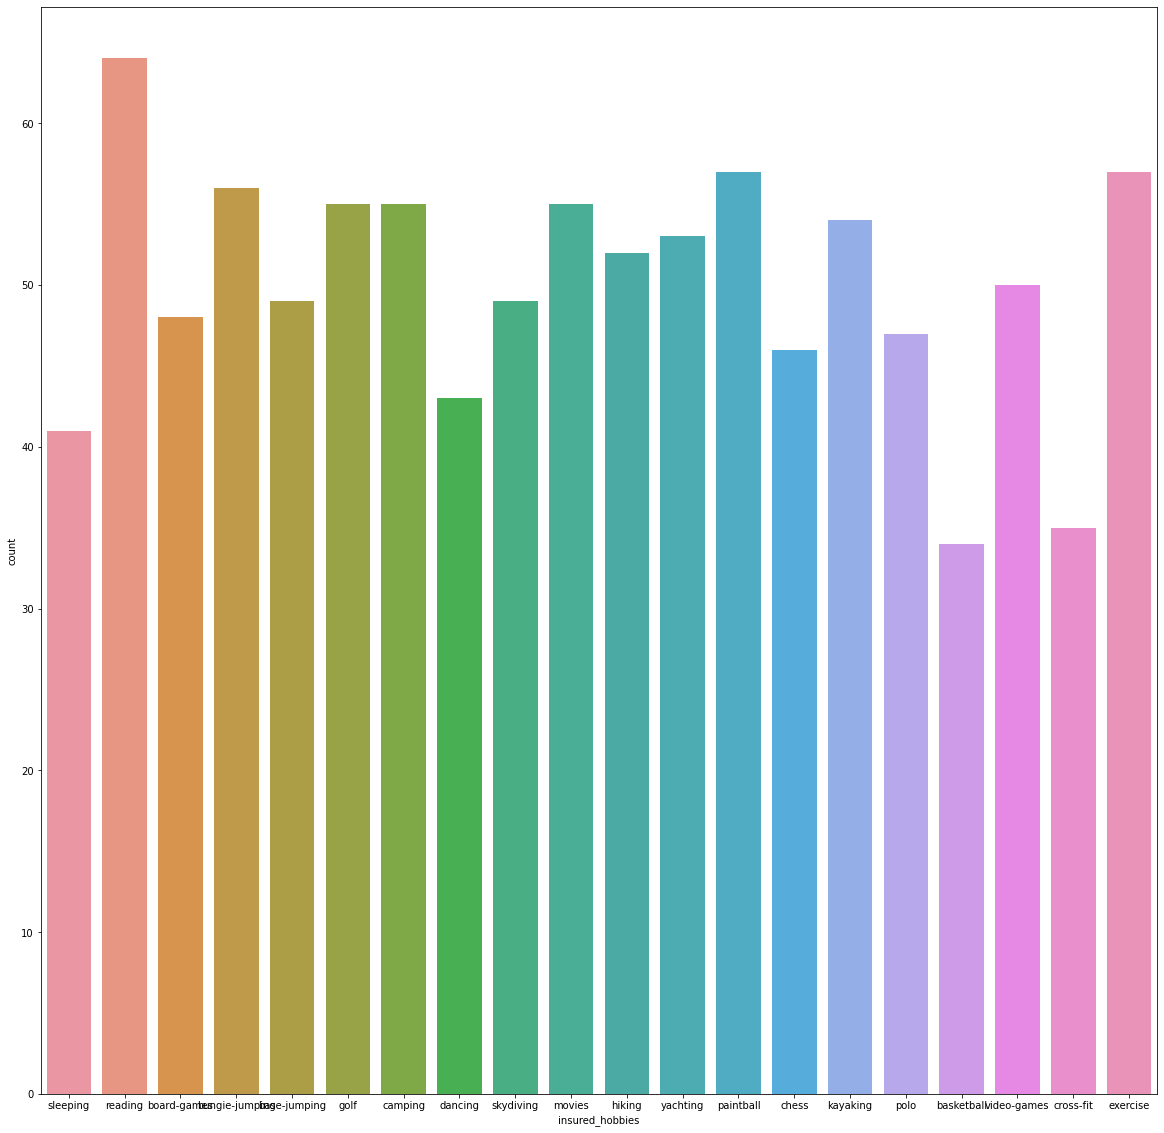

In [26]:
#insured_hobbies
plt.subplots(figsize=(20,20))
sns.countplot(df['insured_hobbies'])

In [27]:
#insured people are more inclied towards exercise and reading.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

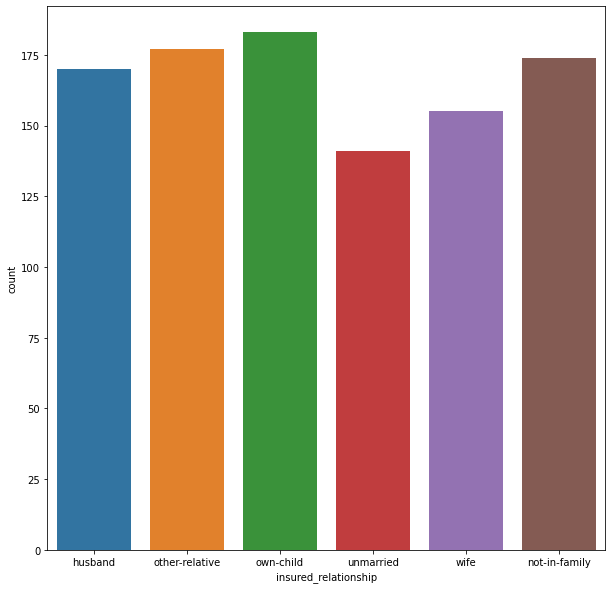

In [28]:
#insured_relationship
plt.subplots(figsize=(10,10))
sns.countplot(df['insured_relationship'])

In [29]:
#the data is fairly distributed, however there are less number of unmarried insured people.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

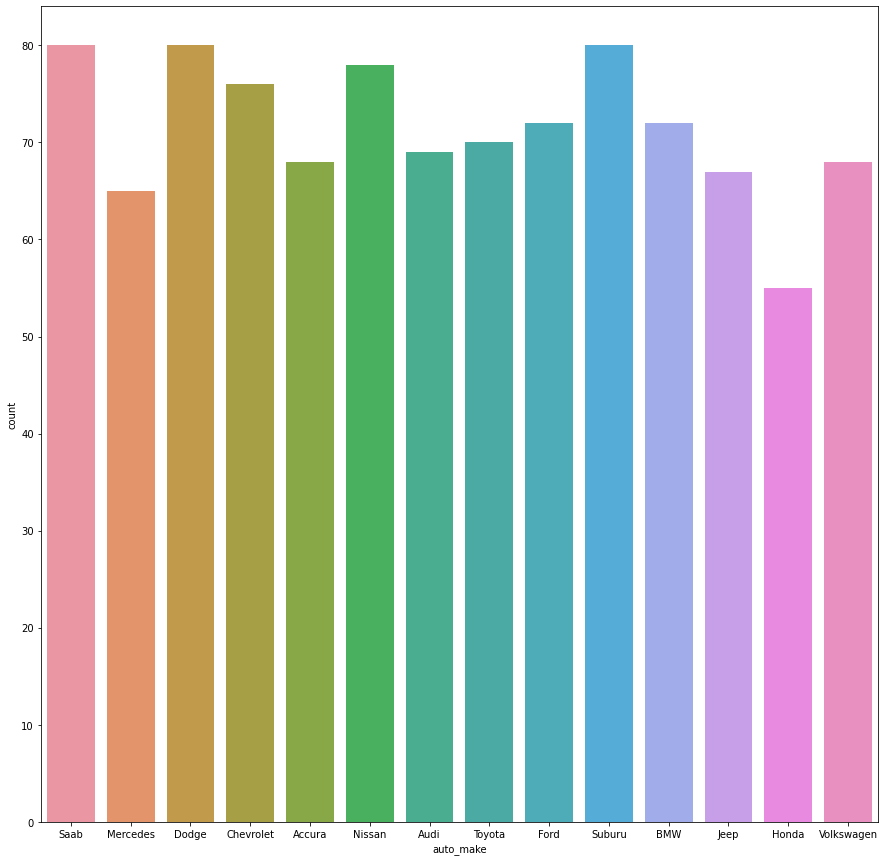

In [30]:
plt.subplots(figsize=(15,15))
sns.countplot(df['auto_make'])

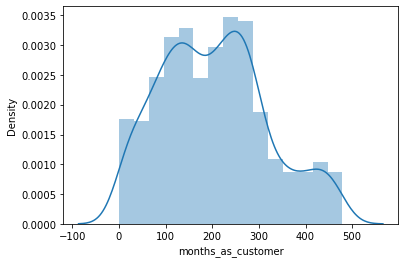

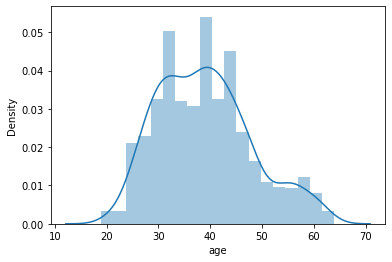

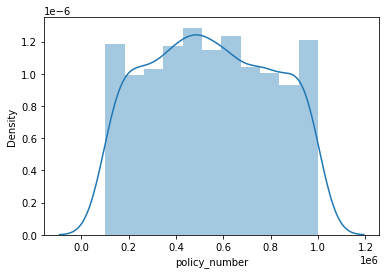

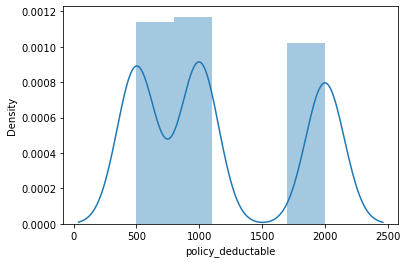

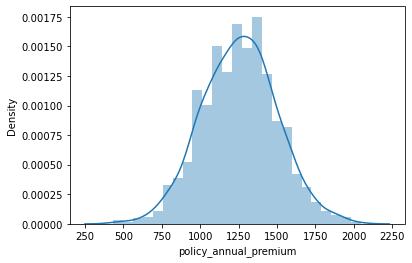

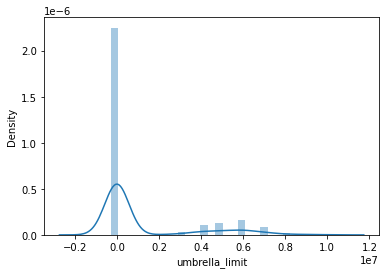

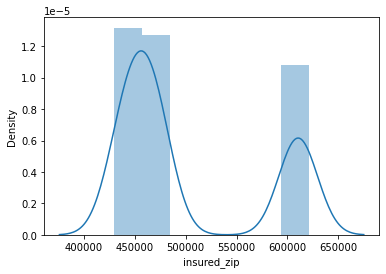

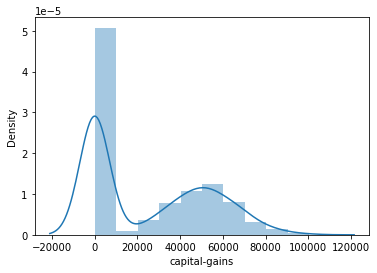

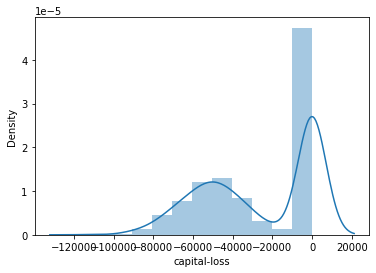

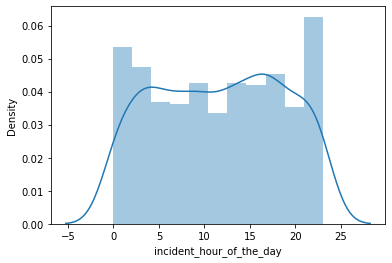

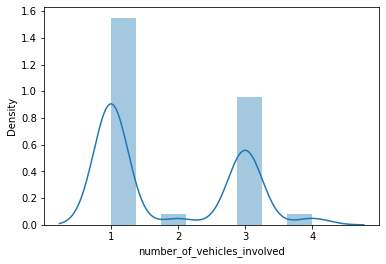

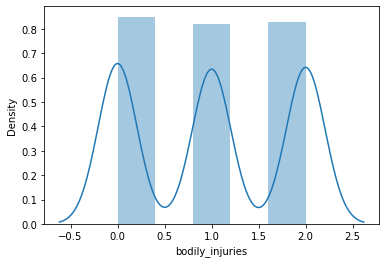

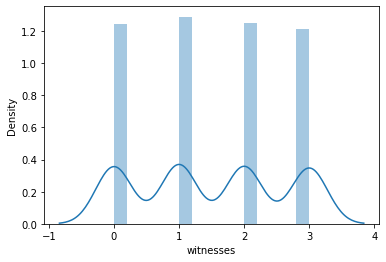

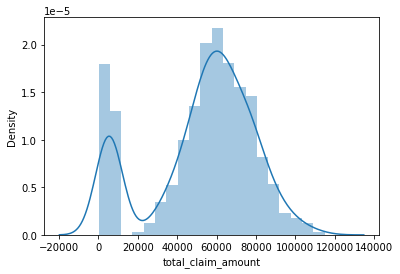

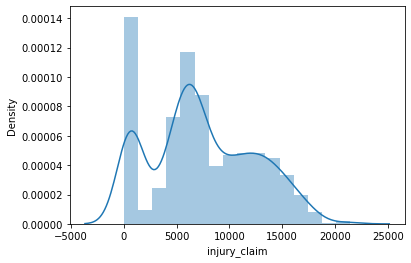

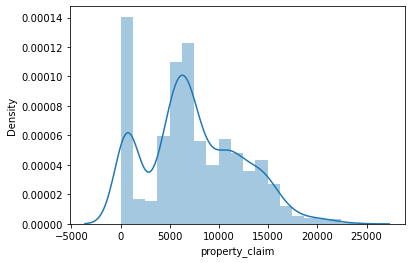

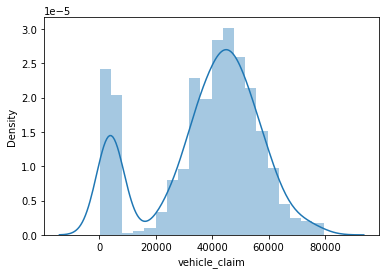

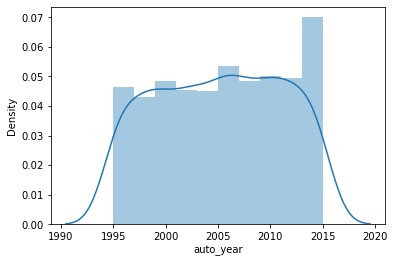

In [31]:
# checking wheather data is normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='policy_state', ylabel='count'>

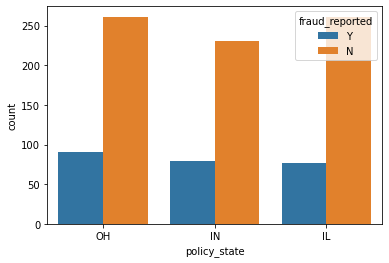

In [35]:
#Policy state
sns.countplot(x="policy_state",hue="fraud_reported",data=df)

In [36]:
#There are slightly more number of fraud detected in Oh than others.

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

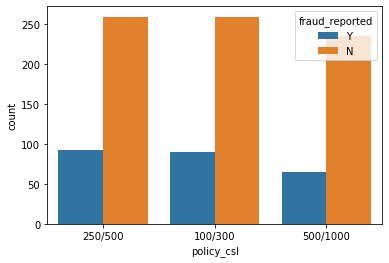

In [37]:
#Policy_csl
sns.countplot(x="policy_csl",hue="fraud_reported",data=df)

In [38]:
#the policy csl 500/1000 saw least number of fraud

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

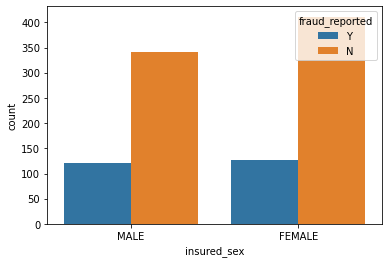

In [39]:
#insured_sex
sns.countplot(x="insured_sex",hue="fraud_reported",data=df)

In [ ]:
#the data is nearly equal

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

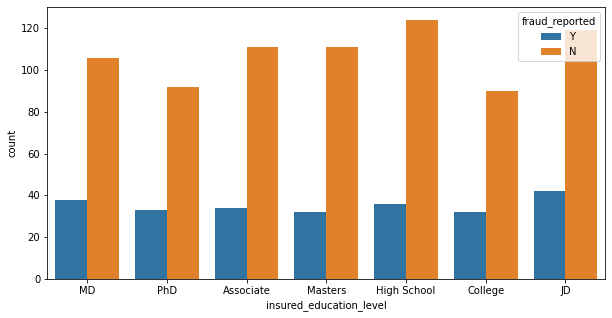

In [40]:
#Insured education level
plt.figure(figsize=(10,5))
sns.countplot(x="insured_education_level", hue="fraud_reported", data=df)

In [41]:
#people with Juris Doctor abbreviated as JD commited more number of fraud than others

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

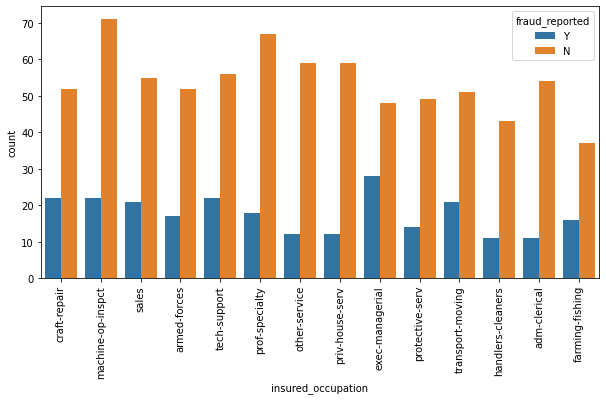

In [42]:
#Insure_occupation
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="insured_occupation", hue="fraud_reported", data=df)

In [43]:
#people in exex managarial commited highest number of fraud while people in other services commited least ammount of fraud.

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

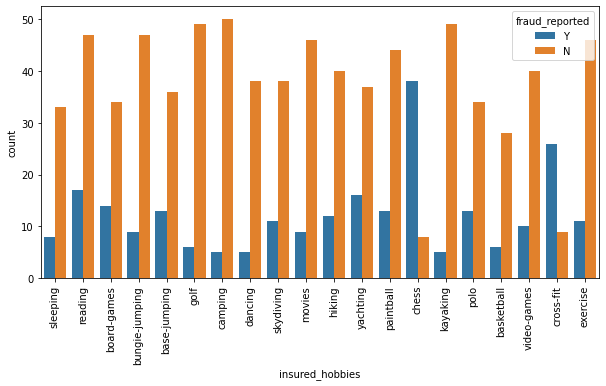

In [44]:
#insured hobbies
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="insured_hobbies", hue="fraud_reported", data=df)

In [45]:
#people who play chess has commited highest number of fraud.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

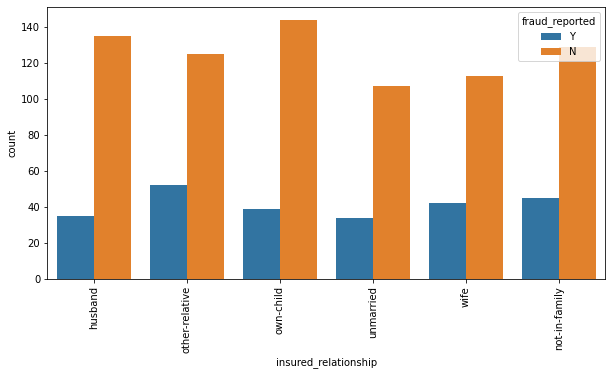

In [46]:
#Insured relationship
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="insured_relationship", hue="fraud_reported", data=df)

In [47]:
#insured relatives people has commited more fraud than others.

<AxesSubplot:xlabel='incident_date', ylabel='count'>

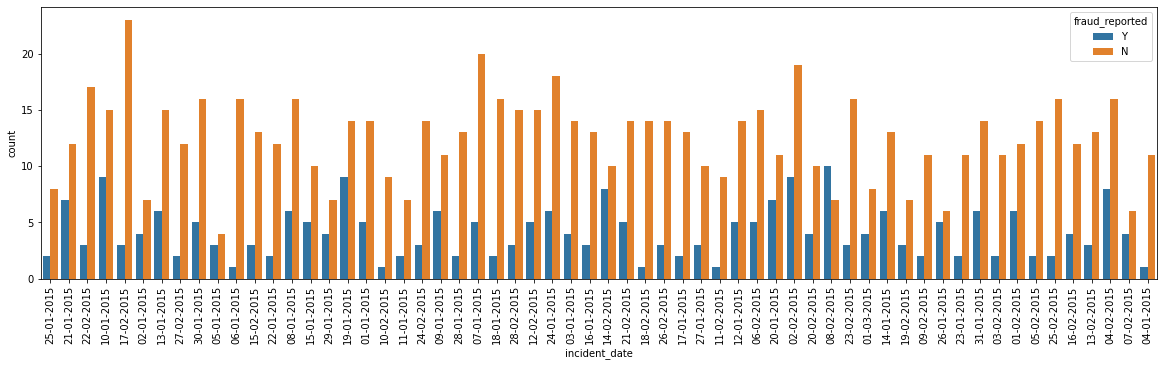

In [48]:
#Incident date
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x="incident_date", hue="fraud_reported", data=df)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

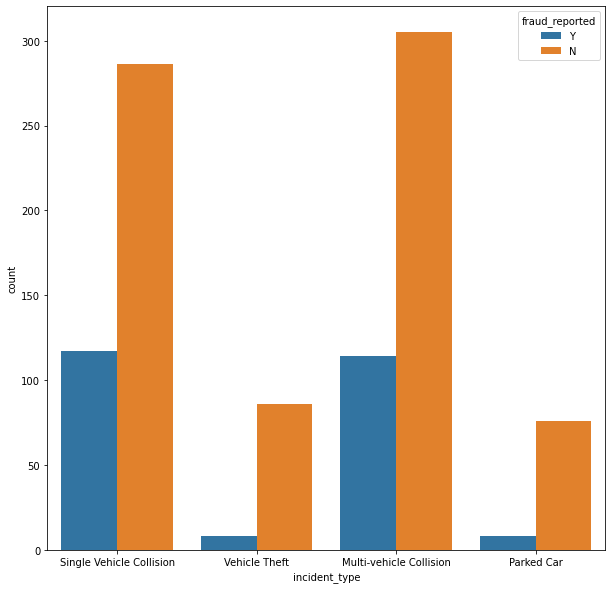

In [49]:
plt.subplots(figsize=(10,10))
sns.countplot(x="incident_type",hue="fraud_reported",data=df)

In [50]:
#in single veichal collision and multi collision incident most number of fraud has been detected

<AxesSubplot:xlabel='collision_type', ylabel='count'>

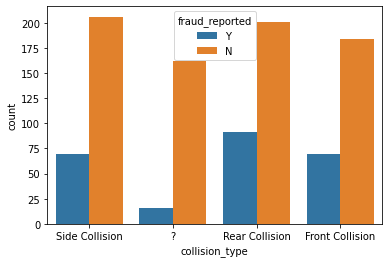

In [51]:
#collison type
sns.countplot(x="collision_type", hue="fraud_reported", data=df)

In [52]:
#in rear collision more number of fraud has been detected

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

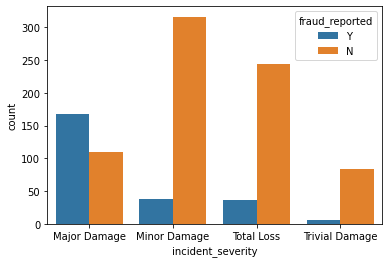

In [53]:
#incident sevearity
sns.countplot(x="incident_severity", hue="fraud_reported", data=df)

In [54]:
#in major damage more number of fraud cases are detected

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

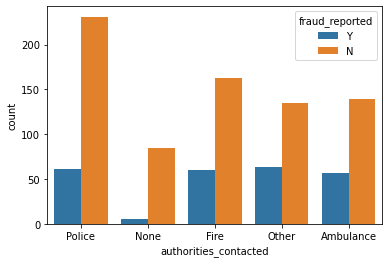

In [55]:
#authorities contacted
sns.countplot(x="authorities_contacted", hue="fraud_reported", data=df)

In [56]:
#in the condition where no authoriters were informed sees very less numbr of fraud

<AxesSubplot:xlabel='incident_state', ylabel='count'>

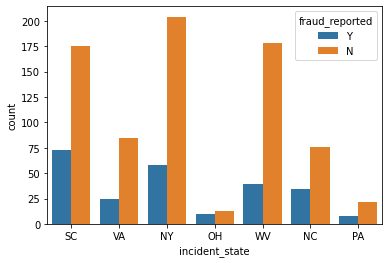

In [57]:
#Incident state
sns.countplot(x="incident_state", hue="fraud_reported",data=df)

In [58]:
#SC and NY saw most number of fraud cases.

<AxesSubplot:xlabel='incident_city', ylabel='count'>

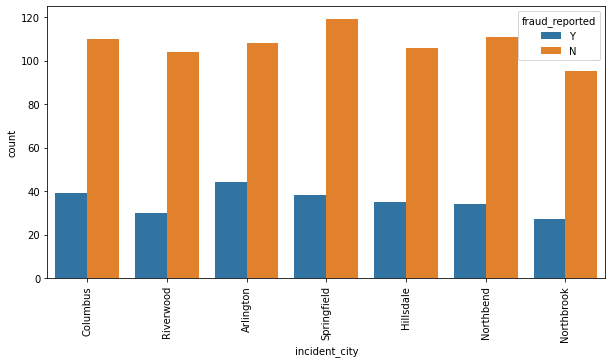

In [59]:
#Incident city
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="incident_city", hue="fraud_reported", data=df)

In [60]:
#arlington saw more nmber of fraud cases

<AxesSubplot:xlabel='property_damage', ylabel='count'>

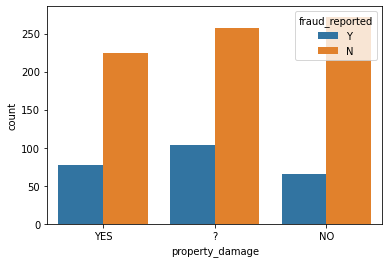

In [61]:
#Property damage
sns.countplot(x="property_damage", hue="fraud_reported", data=df)

In [62]:
#in the condition when there is no surety of damage more number of fraud cases has been detected

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

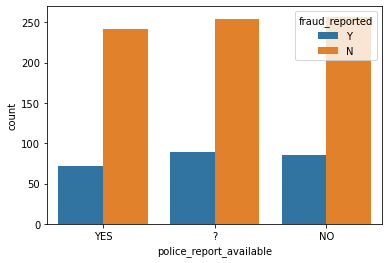

In [63]:
#Police report avalable
sns.countplot(x="police_report_available", hue="fraud_reported", data=df)

In [64]:
#in the senario where there is no surety of availability of police record more number of fraud cases has been detected

<AxesSubplot:xlabel='auto_make', ylabel='count'>

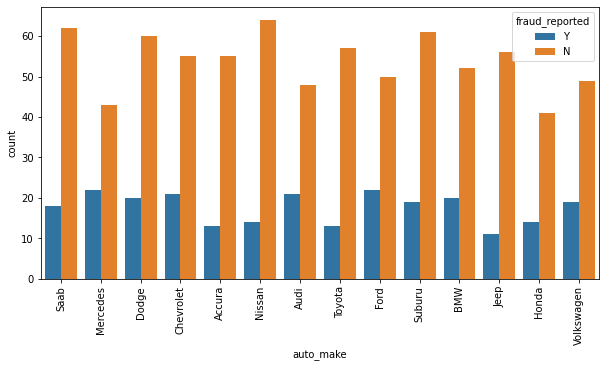

In [65]:
#automake
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="auto_make", hue="fraud_reported", data=df)

In [66]:
#Mercedess,Audi,Ford saw more number of fraud cases than others.

<AxesSubplot:xlabel='auto_model', ylabel='count'>

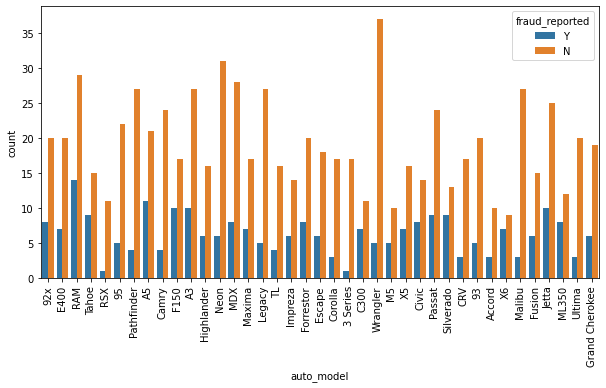

In [67]:
#auto model
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="auto_model", hue="fraud_reported", data=df)

In [68]:
#RAM saw most number of fraud cases.

<AxesSubplot:xlabel='witnesses', ylabel='count'>

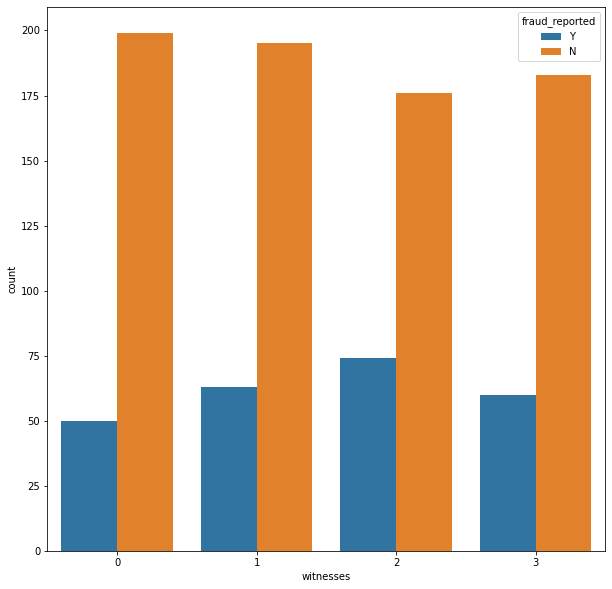

In [70]:
plt.subplots(figsize=(10,10))
sns.countplot(x="witnesses",hue="fraud_reported",data=df)

{'bodies': [<matplotlib.collections.PolyCollection at 0xf9f4a90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0xf9f48b0>,
 'cmins': <matplotlib.collections.LineCollection at 0xf9f48e0>,
 'cbars': <matplotlib.collections.LineCollection at 0xf9f4d00>}

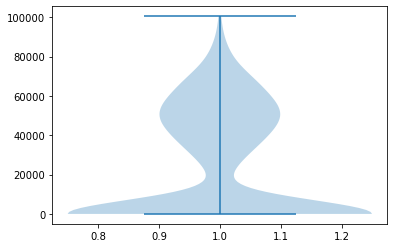

In [71]:
plt.violinplot(df["capital-gains"])

{'bodies': [<matplotlib.collections.PolyCollection at 0xfa55b80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0xfa559d0>,
 'cmins': <matplotlib.collections.LineCollection at 0xfa650a0>,
 'cbars': <matplotlib.collections.LineCollection at 0xfa55e20>}

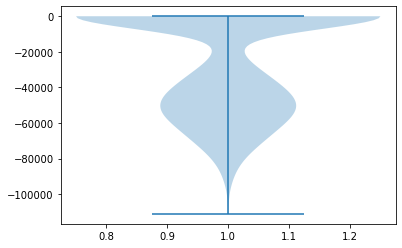

In [72]:
plt.violinplot(df["capital-loss"])

{'bodies': [<matplotlib.collections.PolyCollection at 0xc394be0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0xc3941c0>,
 'cmins': <matplotlib.collections.LineCollection at 0xc394790>,
 'cbars': <matplotlib.collections.LineCollection at 0xeeea5e0>}

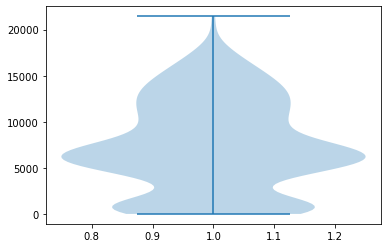

In [73]:
plt.violinplot(df["injury_claim"])

{'bodies': [<matplotlib.collections.PolyCollection at 0xf488b80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0xf488ee0>,
 'cmins': <matplotlib.collections.LineCollection at 0xf3dc610>,
 'cbars': <matplotlib.collections.LineCollection at 0xf5314c0>}

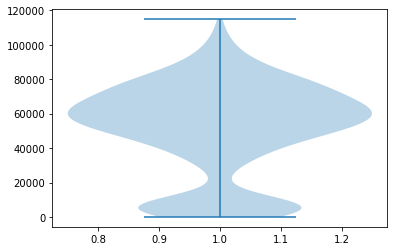

In [74]:
plt.violinplot(df["total_claim_amount"])

{'bodies': [<matplotlib.collections.PolyCollection at 0xf63b8b0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0xf63bc40>,
 'cmins': <matplotlib.collections.LineCollection at 0xf63b400>,
 'cbars': <matplotlib.collections.LineCollection at 0xf63bca0>}

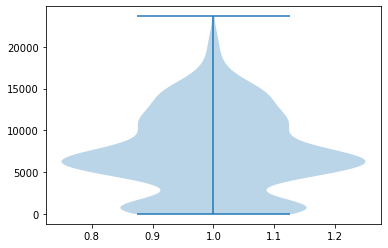

In [75]:
plt.violinplot(df["property_claim"])

{'bodies': [<matplotlib.collections.PolyCollection at 0xf914610>],
 'cmaxes': <matplotlib.collections.LineCollection at 0xf914460>,
 'cmins': <matplotlib.collections.LineCollection at 0xf914490>,
 'cbars': <matplotlib.collections.LineCollection at 0xf914ac0>}

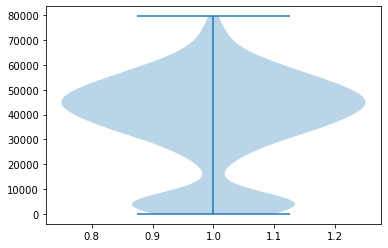

In [76]:
plt.violinplot(df["vehicle_claim"])

# Outliers

months_as_customer                AxesSubplot(0.125,0.772143;0.0945122x0.107857)
age                            AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
policy_number                  AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
policy_deductable              AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
policy_annual_premium          AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
umbrella_limit                 AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
insured_zip                    AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
capital-gains                     AxesSubplot(0.125,0.642714;0.0945122x0.107857)
capital-loss                   AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
incident_hour_of_the_day       AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
number_of_vehicles_involved    AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
bodily_injuries                AxesSubplot(0.578659,0.642714;0.0945122x0.107857)
witnesses                   

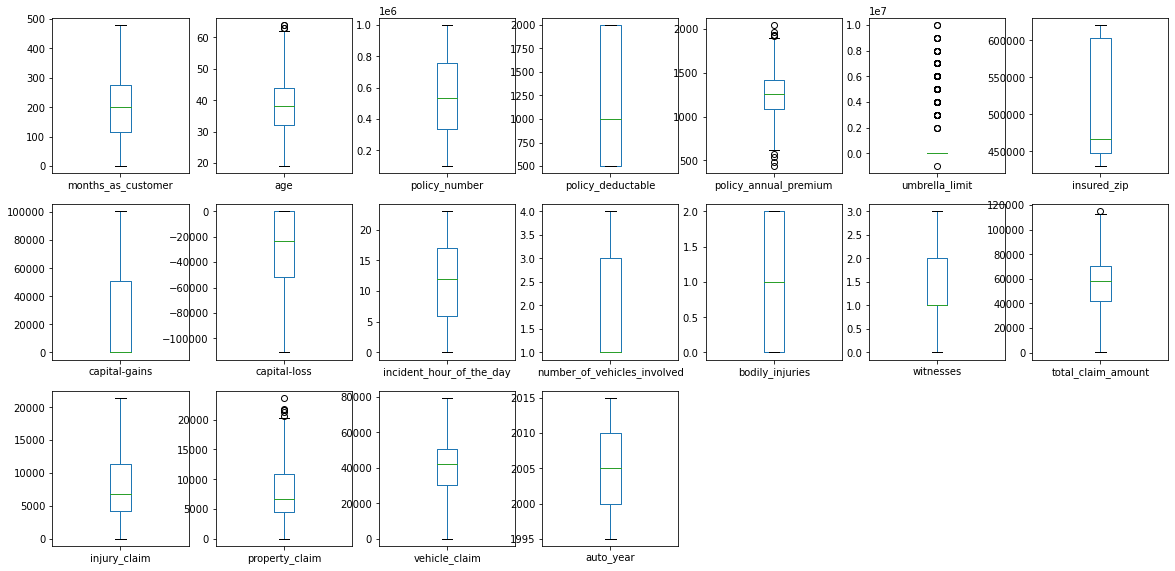

In [77]:
df.plot(kind='box',subplots=True,layout=(6,7),figsize=(20,20))

# Multivariate Analysis

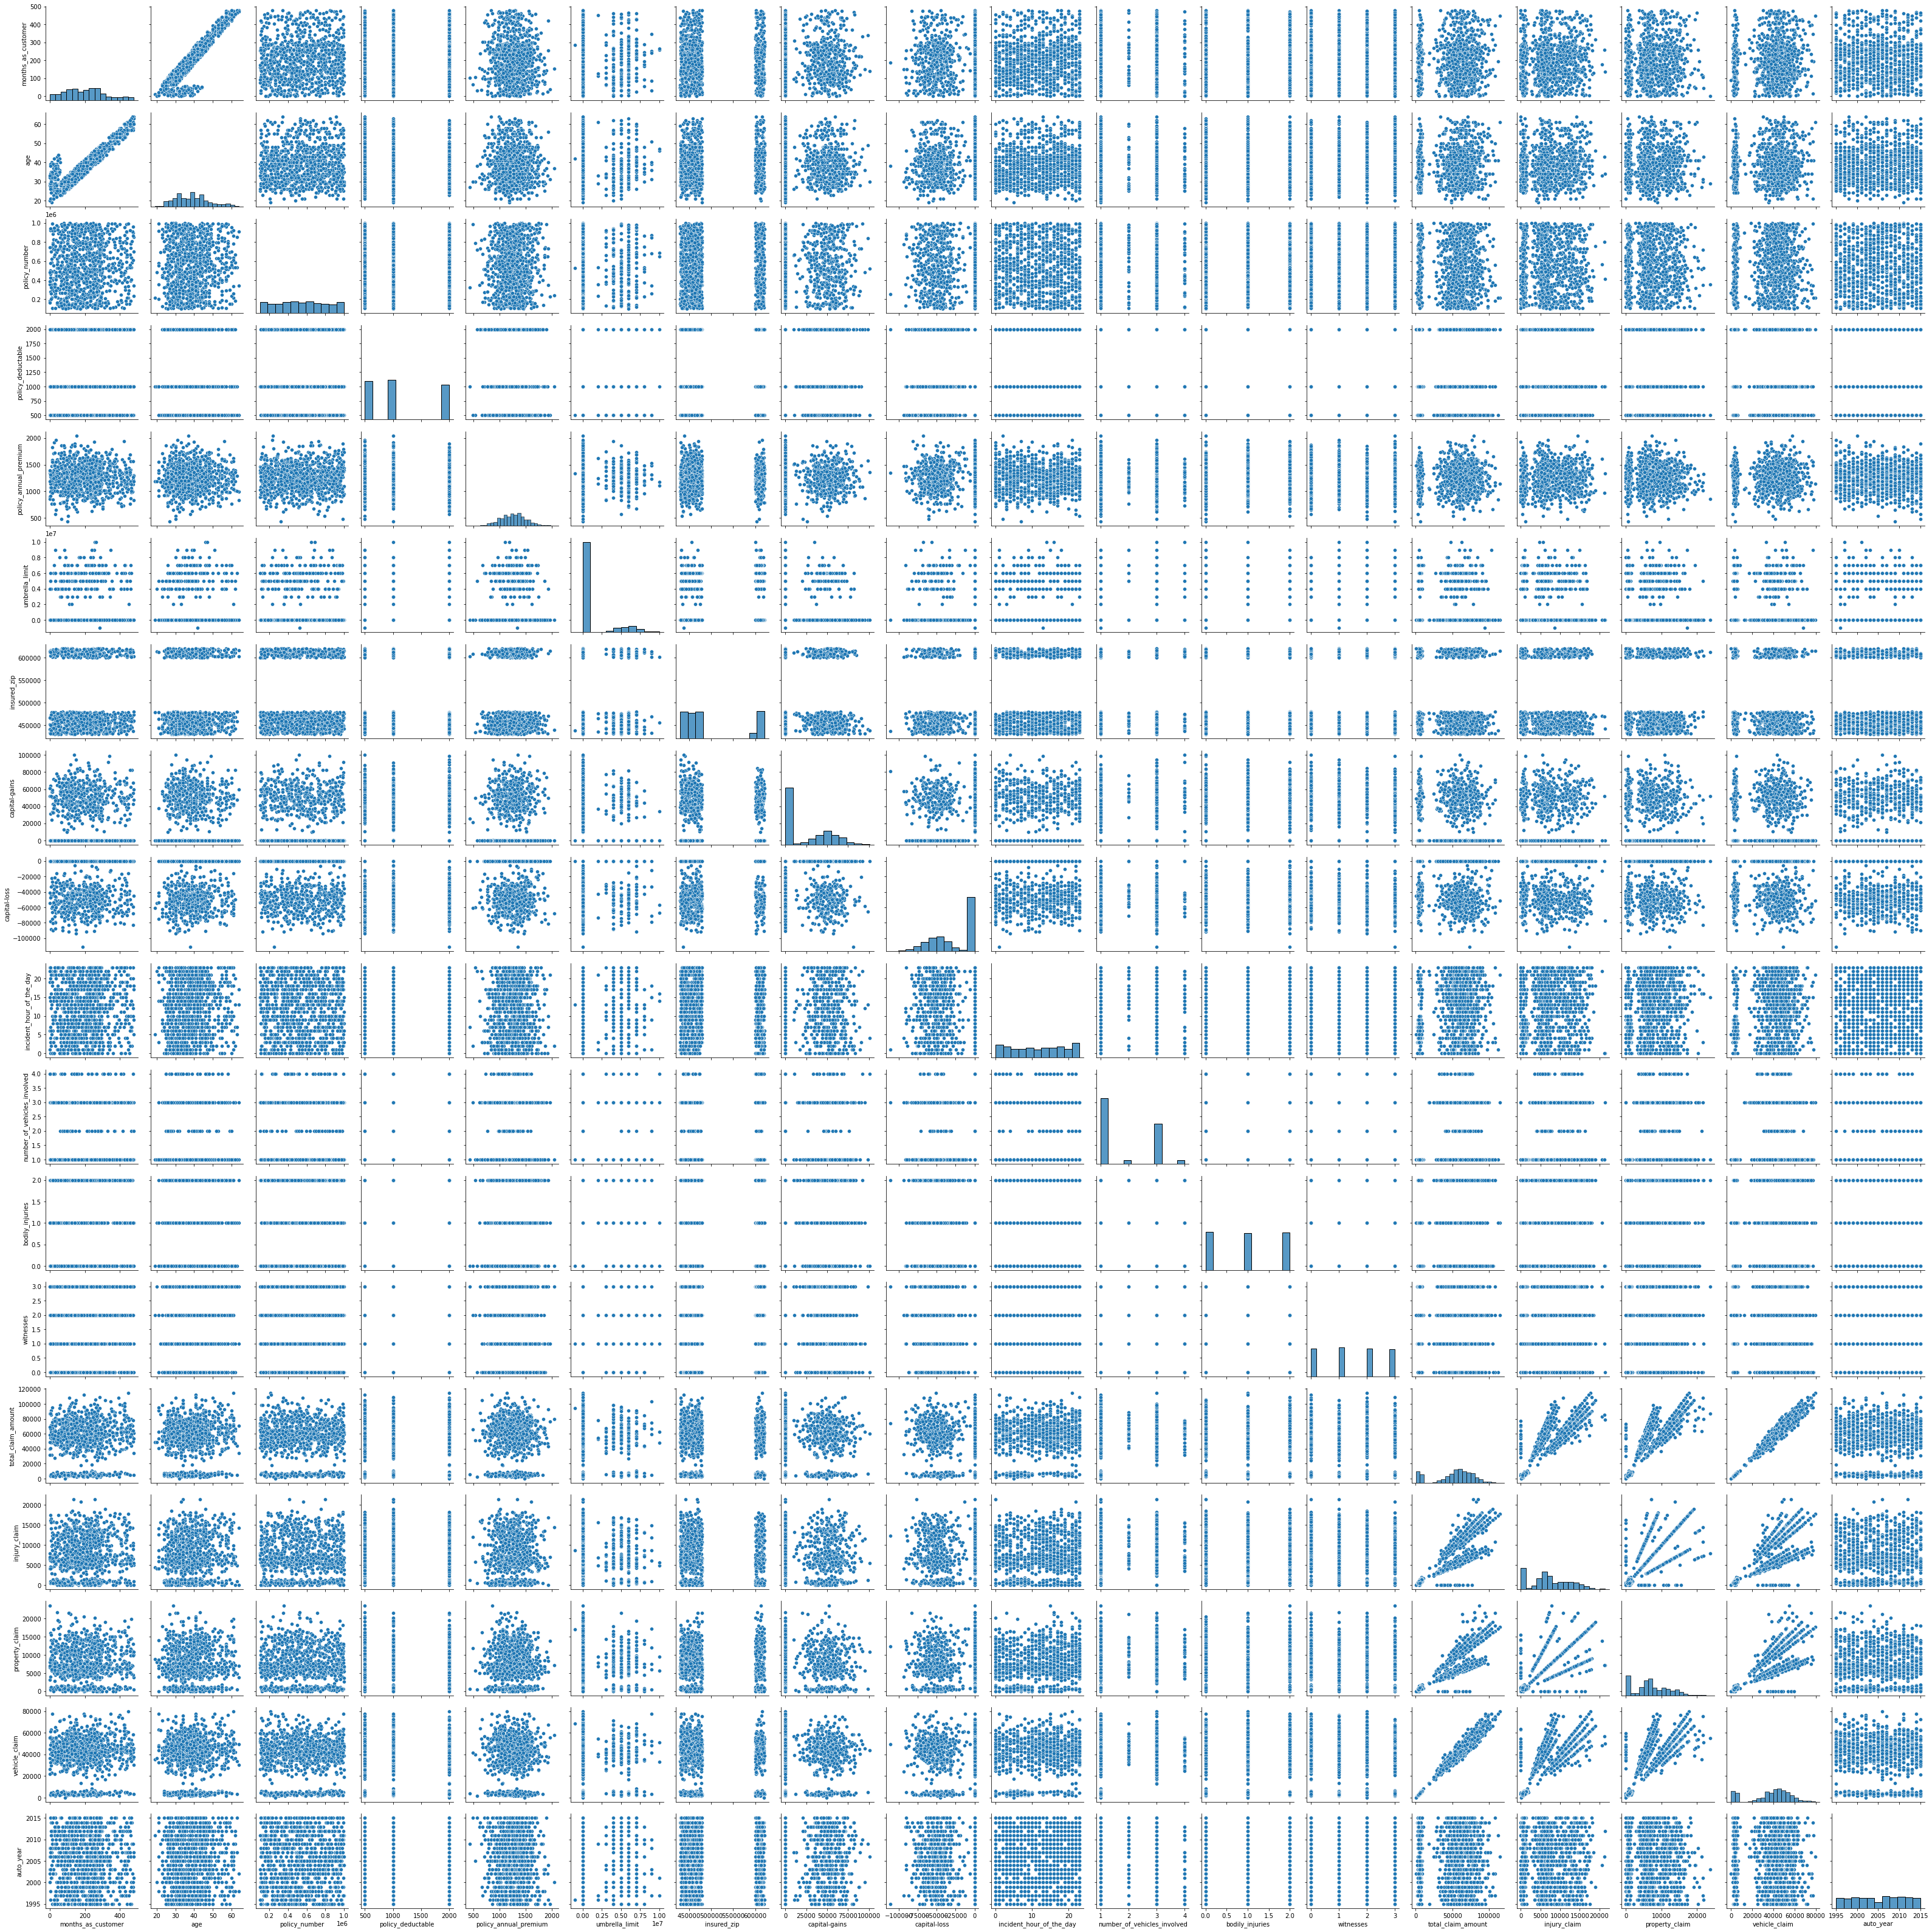

In [78]:
sns.pairplot(df)

# Droping Unnecessary columns

In [79]:
df.drop(columns=["months_as_customer"],inplace=True)
df.drop(columns=["policy_state"],inplace=True)
df.drop(columns=["policy_bind_date"],inplace=True)
df.drop(columns=["incident_date"],inplace=True)
df.drop(columns=["policy_csl"],inplace=True)
df.drop(columns=["incident_state"],inplace=True)
df.drop(columns=["incident_city"],inplace=True)

# Using Label encoder to convert object type data into integer

In [80]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=le.fit_transform(df[i])

In [81]:
le=LabelEncoder()
list1=["fraud_reported"]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [82]:
df.describe()

age  policy_number  policy_deductable  policy_annual_premium  \
count  1000.000000    1000.000000        1000.000000            1000.000000   
mean     38.948000  546238.648000        1136.000000            1256.406150   
std       9.140287  257063.005276         611.864673             244.167395   
min      19.000000  100804.000000         500.000000             433.330000   
25%      32.000000  335980.250000         500.000000            1089.607500   
50%      38.000000  533135.000000        1000.000000            1257.200000   
75%      44.000000  759099.750000        2000.000000            1415.695000   
max      64.000000  999435.000000        2000.000000            2047.590000   

       umbrella_limit    insured_zip  insured_sex  insured_education_level  \
count    1.000000e+03    1000.000000  1000.000000              1000.000000   
mean     1.101000e+06  501214.488000     0.463000                 2.966000   
std      2.297407e+06   71701.610941     0.498879                 1.948497   
min     -1.000000e+06  430104.000000     0.000000                 0.000000   
25%      0.000000e+00  448404.500000     0.000000                 1.000000   
50%      0.000000e+00  466445.500000     0.000000                 3.000000   
75%      0.000000e+00  603251.000000     1.000000                 5.000000   
max      1.000000e+07  620962.000000     1.000000                 6.000000   

       insured_occupation  insured_hobbies  ...    witnesses  \
count         1000.000000      1000.000000  ...  1000.000000   
mean             6.653000         9.731000  ...     1.487000   
std              4.019048         5.674049  ...     1.111335   
min              0.000000         0.000000  ...     0.000000   
25%              3.000000         5.000000  ...     1.000000   
50%              7.000000        10.000000  ...     1.000000   
75%             10.000000        15.000000  ...     2.000000   
max             13.000000        19.000000  ...     3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count              1000.000000          1000.00000   1000.000000   
mean                  0.971000         52761.94000   7433.420000   
std                   0.810442         26401.53319   4880.951853   
min                   0.000000           100.00000      0.000000   
25%                   0.000000         41812.50000   4295.000000   
50%                   1.000000         58055.00000   6775.000000   
75%                   2.000000         70592.50000  11305.000000   
max                   2.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make   auto_model    auto_year  \
count     1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean      7399.570000   37928.950000     6.546000    19.318000  2005.103000   
std       4824.726179   18886.252893     4.034869    11.136107     6.015861   
min          0.000000      70.000000     0.000000     0.000000  1995.000000   
25%       4445.000000   30292.500000     3.000000    10.000000  2000.000000   
50%       6750.000000   42100.000000     7.000000    20.000000  2005.000000   
75%      10885.000000   50822.500000    10.000000    29.000000  2010.000000   
max      23670.000000   79560.000000    13.000000    38.000000  2015.000000   

       fraud_reported  
count     1000.000000  
mean         0.247000  
std          0.431483  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 32 columns]

# Coorelation

<function matplotlib.pyplot.show(close=None, block=None)>

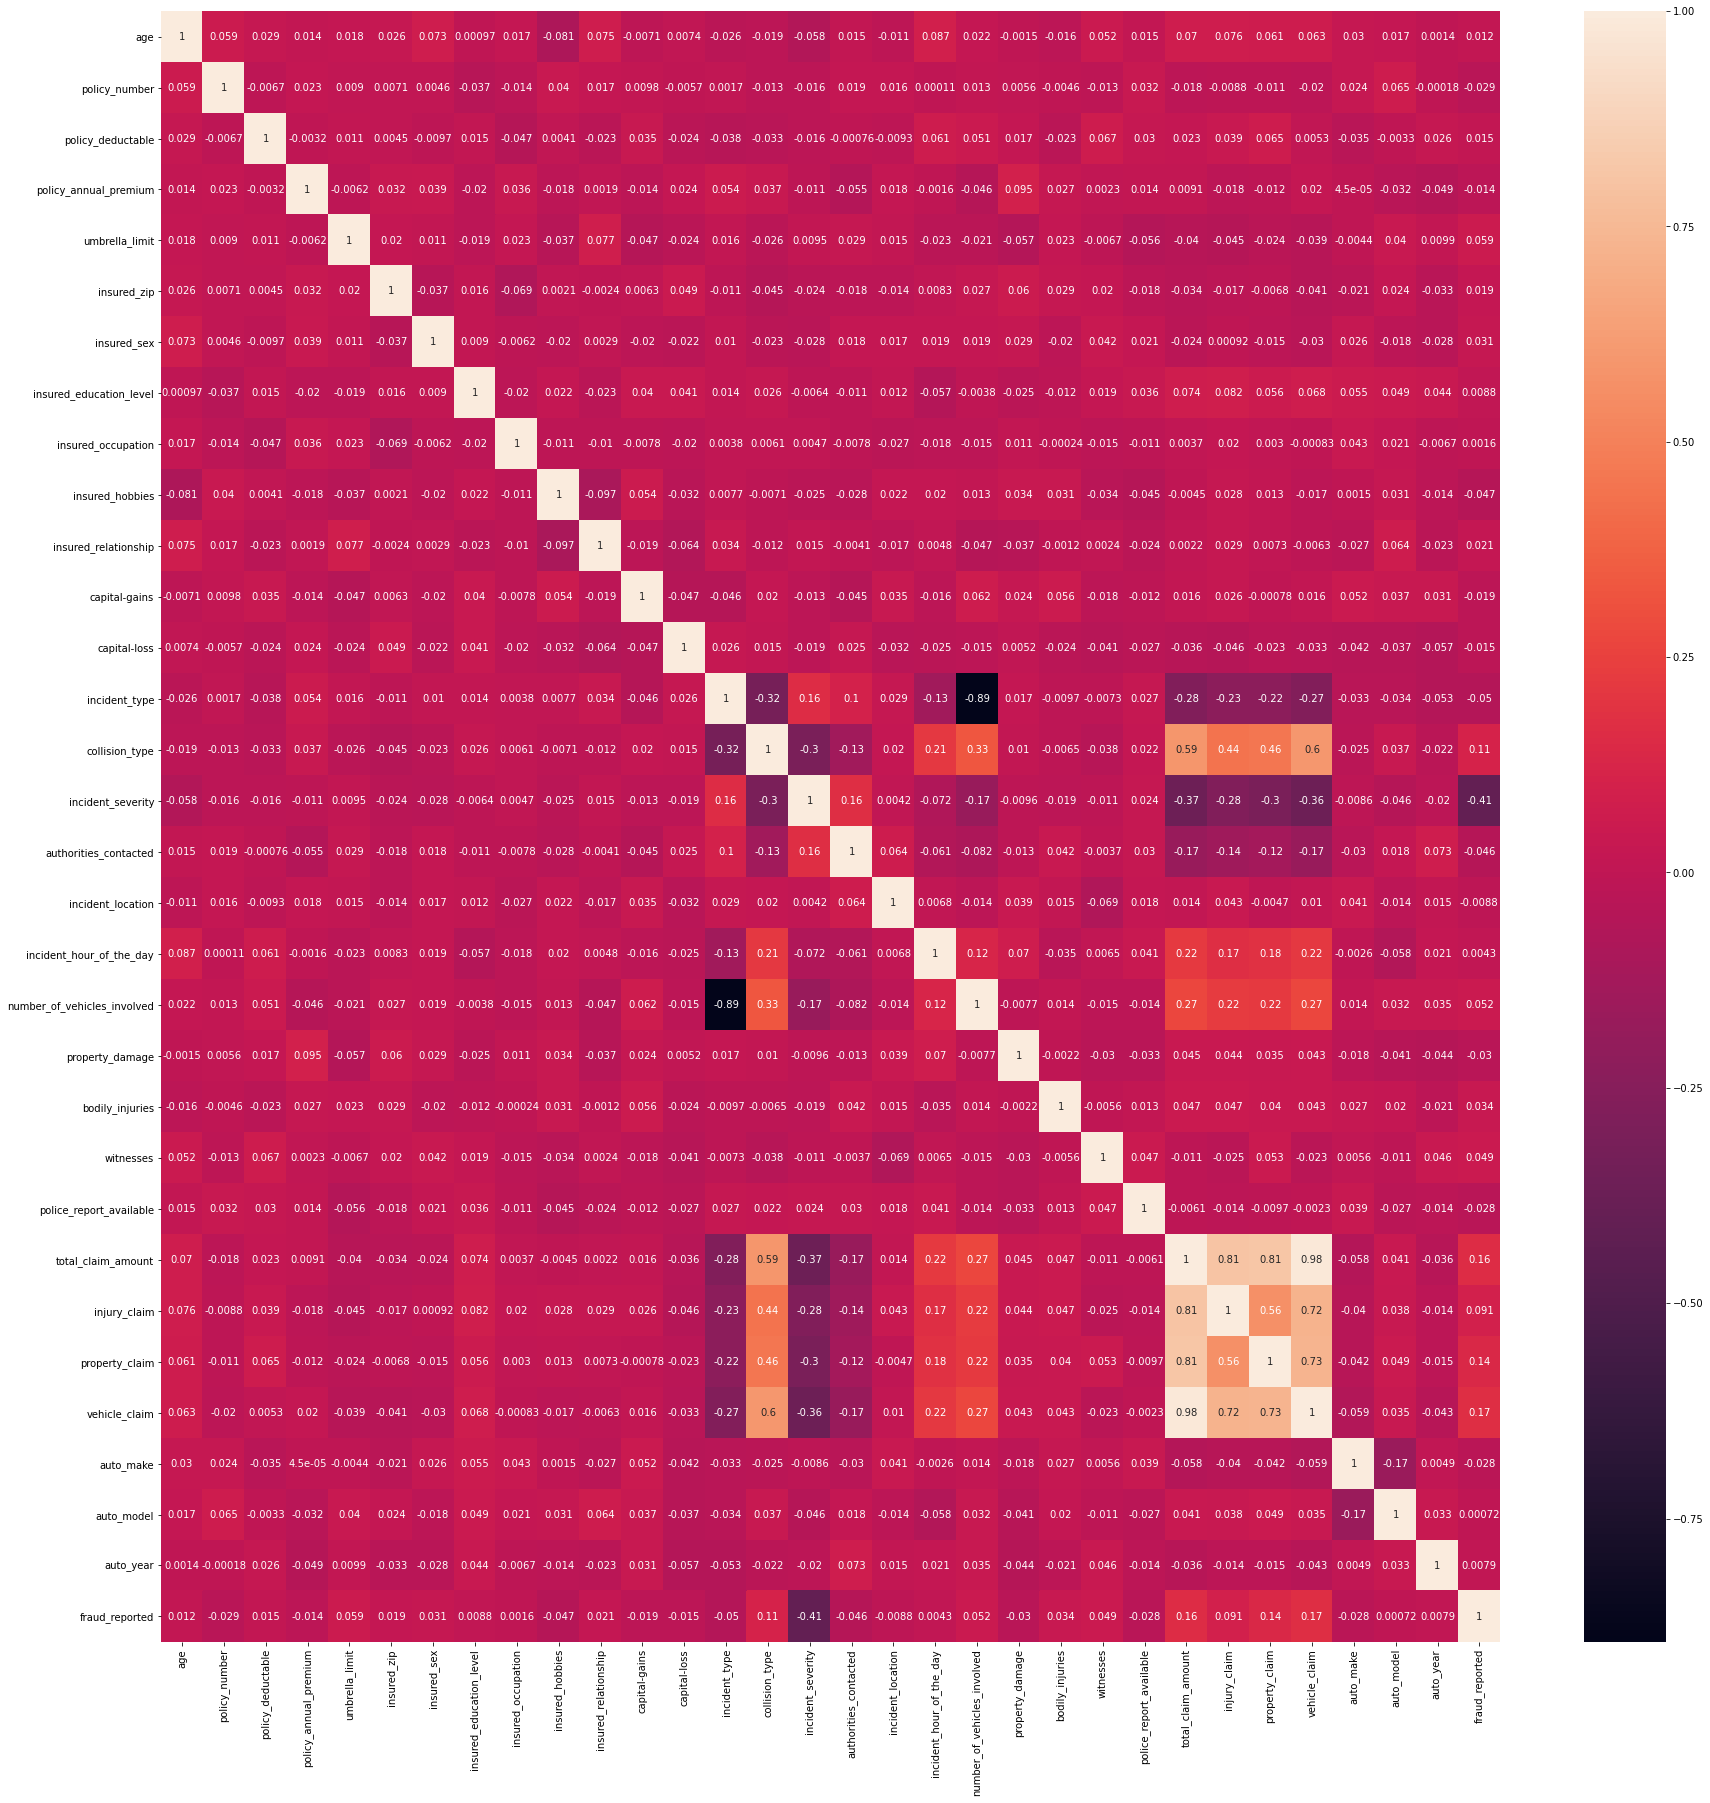

In [83]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show

As we can see that total claim amount is a sum of injury claim , property claim and vechicle claim and they are highly co-related with each other .So we can drop injury claim, property claim and vehicle claim.

In [84]:
df.drop(columns=["injury_claim"],inplace=True)
df.drop(columns=["property_claim"],inplace=True)
df.drop(columns=["vehicle_claim"],inplace=True)

# Removing Outliers

In [85]:
print("The shape before removing outliers and skewness",df.shape)
print("skewness before removing outliers")
print(df.skew())

The shape before removing outliers and skewness (1000, 29)
skewness before removing outliers
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                  

In [86]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [87]:
print("new shape after removing outliers",df.shape)
print("skewness after removing outliers")
print(df.skew())

new shape after removing outliers (981, 29)
skewness after removing outliers
age                            0.476788
policy_number                  0.038113
policy_deductable              0.477577
policy_annual_premium          0.036211
umbrella_limit                 1.803065
insured_zip                    0.833700
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.053311
insured_hobbies               -0.063050
insured_relationship           0.079116
capital-gains                  0.464155
capital-loss                  -0.378586
incident_type                  0.088647
collision_type                -0.195473
incident_severity              0.278443
authorities_contacted         -0.115766
incident_location             -0.005108
incident_hour_of_the_day      -0.040633
number_of_vehicles_involved    0.511409
property_damage                0.102995
bodily_injuries                0.001877
witnesses                      0.024567
pol

# Splitting the data into input and target

In [106]:
x=df.drop("fraud_reported", axis=1)
x

age  policy_number  policy_deductable  policy_annual_premium  \
0     48         521585               1000                1406.91   
1     42         342868               2000                1197.22   
2     29         687698               2000                1413.14   
3     41         227811               2000                1415.74   
4     44         367455               1000                1583.91   
..   ...            ...                ...                    ...   
995   38         941851               1000                1310.80   
996   41         186934               1000                1436.79   
997   34         918516                500                1383.49   
998   62         533940               2000                1356.92   
999   60         556080               1000                 766.19   

     umbrella_limit  insured_zip  insured_sex  insured_education_level  \
0                 0       466132            1                        4   
1           5000000       468176            1                        4   
2           5000000       430632            0                        6   
3           6000000       608117            0                        6   
4           6000000       610706            1                        0   
..              ...          ...          ...                      ...   
995               0       431289            0                        5   
996               0       608177            0                        6   
997         3000000       442797            0                        5   
998         5000000       441714            1                        0   
999               0       612260            0                        0   

     insured_occupation  insured_hobbies  ...  incident_hour_of_the_day  \
0                     2               17  ...                         5   
1                     6               15  ...                         8   
2                    11                2  ...                         7   
3                     1                2  ...                         5   
4                    11                2  ...                        20   
..                  ...              ...  ...                       ...   
995                   2               13  ...                        20   
996                   9               17  ...                        23   
997                   1                3  ...                         4   
998                   5                0  ...                         2   
999                  11               11  ...                         6   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                              1                2                1          2   
1                              1                0                0          0   
2                              3                1                2          3   
3                              1                0                1          2   
4                              1                1                0          1   
..                           ...              ...              ...        ...   
995                            1                2                0          1   
996                            1                2                2          3   
997                            3                0                2          3   
998                            1                0                0          1   
999                            1                0                0          3   

     police_report_available  total_claim_amount  auto_make  auto_model  \
0                          2               71610         10           1   
1                          0                5070          8          12   
2                          1               34650          4          30   
3                          1               63400          3          34   
4                          1          

In [107]:
y=df["fraud_reported"]
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 981, dtype: int32

# We can see that this is a case of imbalance, so will do oversampling

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

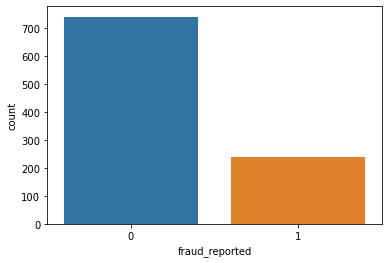

In [108]:
#the dependent varible is unbalenced
sns.countplot(y)

In [109]:
#using upsampling to balance the data
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

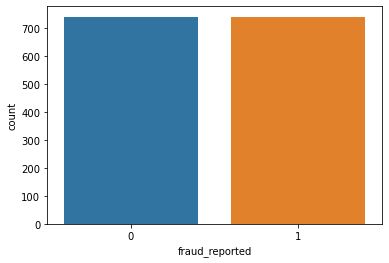

In [110]:
#balanced data
sns.countplot(y)

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

# Importing Necessary Libraries

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [113]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [114]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

max acc score corresponding to 61 is 0.8619528619528619


61

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1111, 28)
(1111,)
(371, 28)
(371,)


# Using GridSearchCV to find best parameters

In [116]:
# Logistic Regression
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'penalty': 'l2'}




In [117]:
# DecisionaTreeClassifier
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'criterion': 'entropy'}




In [118]:
#KNeighborsClassifier
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'n_neighbors': 2}




In [119]:
#SVC
svc=SVC()
parameters={'kernel':('linear', 'poly', 'rbf'),'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'C': 10, 'kernel': 'rbf'}




In [120]:
#GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'learning_rate': 0.1, 'n_estimators': 150}




In [121]:
# RandomForestClassifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'max_features': 'auto', 'n_estimators': 150}




In [122]:
# AdaBoostClassifier
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)

{'learning_rate': 1, 'n_estimators': 50}




The model score for LogisticRegression() are:
[0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0
 1]
Accuracy score = 0.8140161725067385
The cv score is 0.8003981253981255

[[157  26]
 [ 43 145]]

              precision    recall  f1-score   support

           0       0.79      0.86      0.82    

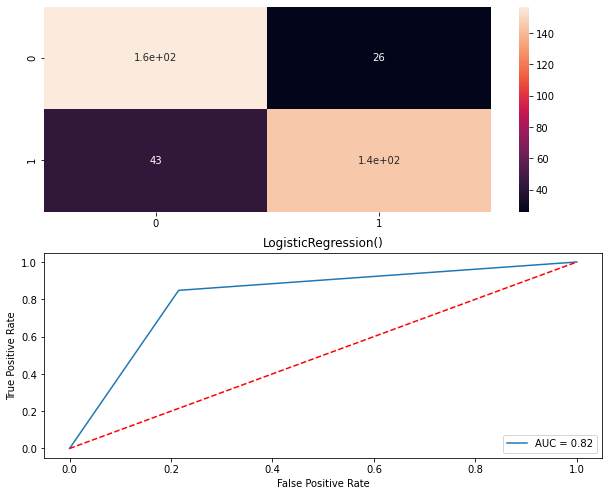

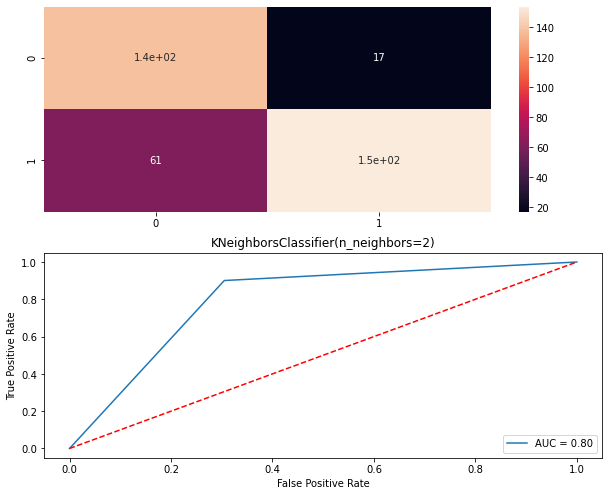

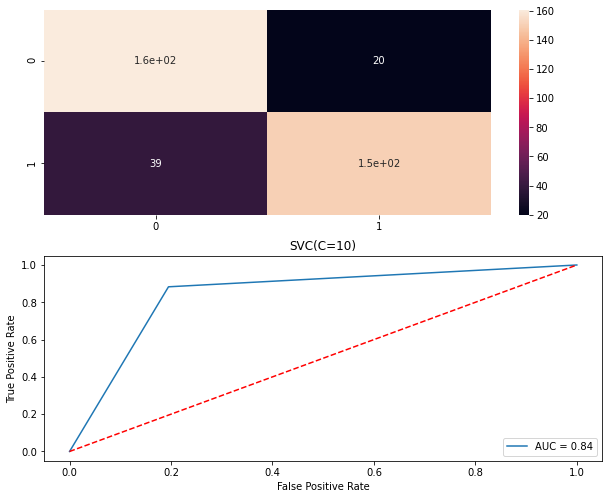

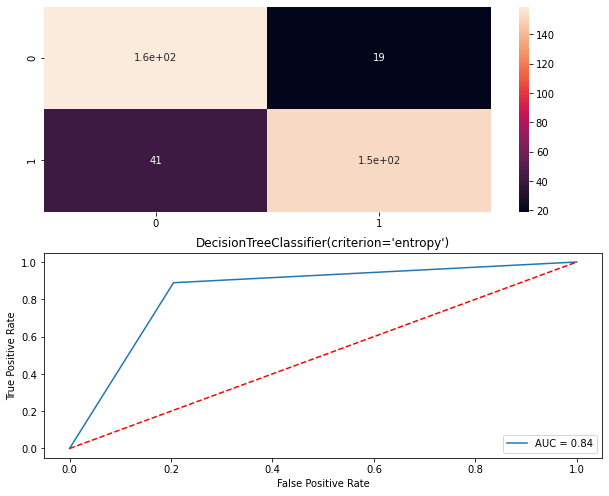

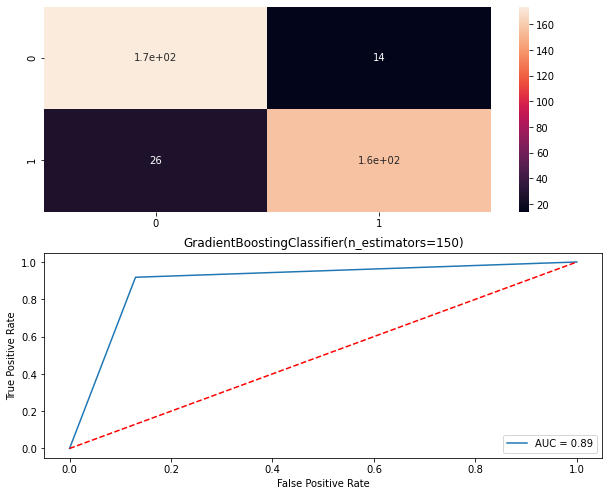

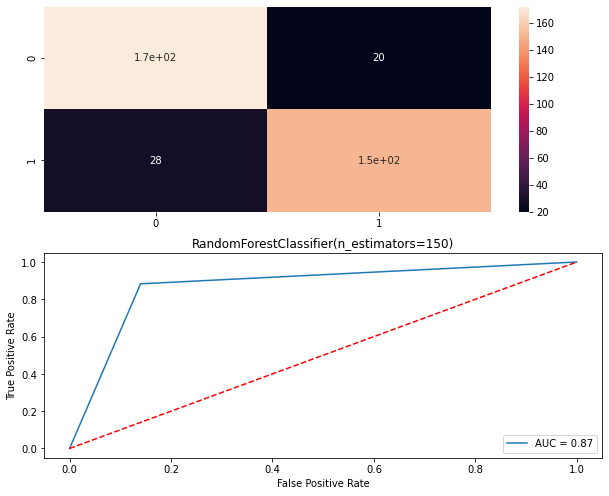

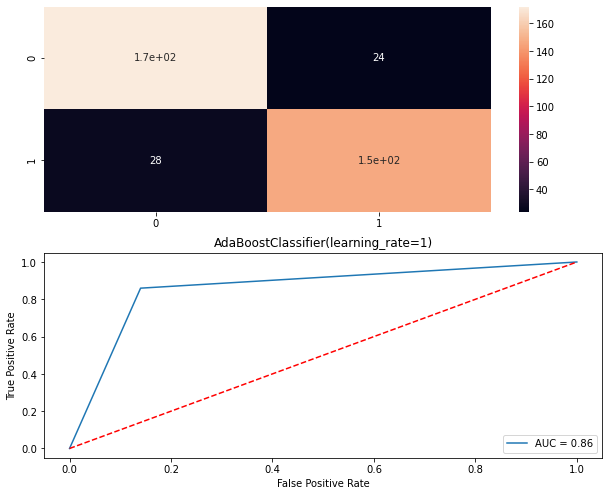

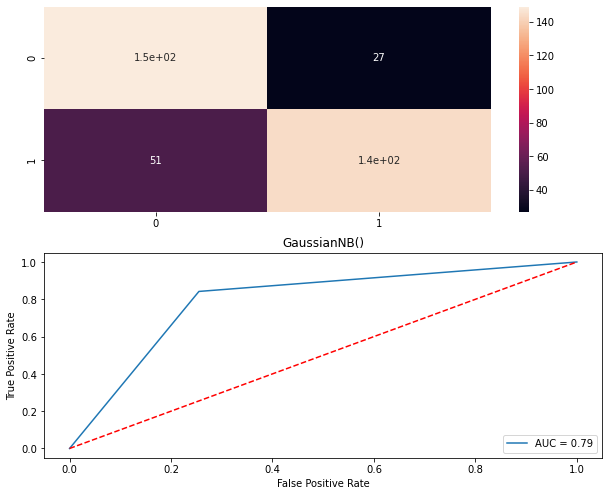

In [123]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=2),SVC(C=10,kernel='rbf'),
          DecisionTreeClassifier(criterion='entropy'),GradientBoostingClassifier(learning_rate=0.1,n_estimators=150),
          RandomForestClassifier(max_features='auto',n_estimators=150),
          AdaBoostClassifier(learning_rate =1, n_estimators = 50),GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(x_train,y_train)
    k.score(x_train,y_train)
    predict=k.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sn.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [124]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','SVC','GaussianNB','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

Model  Accuracy_Score  Cross_val_score  Roc_auc_curve
0          LogisticRegression        0.814016         0.800398       0.816477
1        KNeighborsClassifier        0.789757         0.828670       0.797792
2                         SVC        0.840970         0.848992       0.844020
3                  GaussianNB        0.838275         0.819249       0.841944
4      DecisionTreeClassifier        0.892183         0.868519       0.894064
5  GradientBoostingClassifier        0.870620         0.861782       0.871520
6      RandomForestClassifier        0.859838         0.835488       0.859825
7          AdaBoostClassifier        0.789757         0.759887       0.793553

# From DataFrame we can see that Decision Tree Classifier is the best Performing Model

In [125]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
predict=dtc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

Accuracy Score = 0.8436657681940701
The CV Score = 0.7598871598871599
roc_auc_score 0.8444005847953215


Text(0.5, 0, 'False Positive Rate')

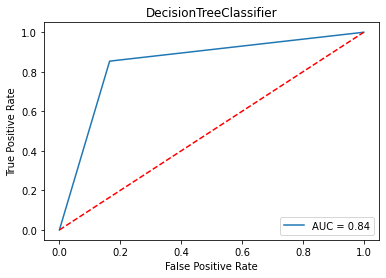

In [126]:
plt.title('DecisionTreeClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Saving the Model

In [127]:
import joblib
joblib.dump(dtc,"Insurance_claim_fraud_Detection.pkl")

['Insurance_claim_fraud_Detection.pkl']